# Understanding the Weights in RNNs

## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Look at the code in [Part A: Single Unit Simple Recurrent Layer](#Part-A:-Single-Unit-Simple-Recurrent-Layer) and complete the [Part A Exercise](#Part-A-Exercise)
0. Look at the code in [Part B: Two Unit Simple Recurrent Layer](#Part-B:-Two-Unit-Simple-Recurrent-Layer) and complete the [Part B Exercise](#Part-B-Exercise)
0. Optionally, look at the code in [Part C: LSTM Layer](#Part-C:-LSTM-Layer) and complete the [Part C Exercise](#Part-C-Exercise)

## Documentation/Sources
* [Class Notes](https://jennselby.github.io/MachineLearningCourseNotes/#recurrent-neural-networks)
* [https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/](https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/) for information on sequence classification with keras
* [https://keras.io/](https://keras.io/) Keras API documentation
* [Keras recurrent tutorial](https://github.com/Vict0rSch/deep_learning/tree/master/keras/recurrent)

## Part A: Single Unit Simple Recurrent Layer

Before we dive into something as complicated as LSTMs, Let's take a deeper look at simple recurrent layer weights.

In [2]:
import numpy
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import LSTM

The neurons in the recurrent layer pass their output to the next layer, but also back to themselves. The input shape says that we'll be passing in one-dimensional inputs of unspecified length (the None is what makes it unspecified).

In [3]:
one_unit_SRNN = Sequential()
one_unit_SRNN.add(SimpleRNN(units=1, input_shape=(None, 1), activation='linear', use_bias=False))

In [4]:
one_unit_SRNN_weights = one_unit_SRNN.get_weights()
one_unit_SRNN_weights

[array([[0.5141717]], dtype=float32), array([[-1.]], dtype=float32)]

We can set the weights to whatever we want, to test out what happens with different weight values.

In [5]:
one_unit_SRNN_weights[0][0][0] = 1
one_unit_SRNN_weights[1][0][0] = 1
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.get_weights()

[array([[1.]], dtype=float32), array([[1.]], dtype=float32)]

We can then pass in different input values, to see what the model outputs.

The code below passes in a single sample that has three time steps.

In [6]:
one_unit_SRNN.predict(numpy.array([ [[3], [3], [7]] ]))

array([[13.]], dtype=float32)

## Part A Exercise
Figure out what the two weights in the one_unit_SRNN model control. Be sure to test your hypothesis thoroughly. Use different weights and different inputs.

In [18]:
# example 1
# w1=1, w2=1 --> (3*w1 *w2 + 3*w1)*w2 + 7*w1 = 25
one_unit_SRNN_weights[0][0][0] = 1
one_unit_SRNN_weights[1][0][0] = 1
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.predict(numpy.array([ [[3], [3], [7]] ]))

array([[13.]], dtype=float32)

In [21]:
# example 2
# w1=1, w2=2 --> (3*w1 *w2 + 3*w1)*w2 + 7*w1 = 25
one_unit_SRNN_weights[0][0][0] = 1
one_unit_SRNN_weights[1][0][0] = 2
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.predict(numpy.array([ [[3], [3], [7]] ]))

array([[25.]], dtype=float32)

In [22]:
# example 3
# w1=2, w2=2 --> (3*w1 *w2 + 3*w1)*w2 + 7*w1 = 50
one_unit_SRNN_weights[0][0][0] = 2
one_unit_SRNN_weights[1][0][0] = 2
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.predict(numpy.array([ [[3], [3], [7]] ]))

array([[50.]], dtype=float32)

In [23]:
# example 4
# w1=0.5, w2=3 --> (3*w1 *w2 + 3*w1)*w2 + 7*w1 = 21.5
one_unit_SRNN_weights[0][0][0] = 0.5
one_unit_SRNN_weights[1][0][0] = 3
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.predict(numpy.array([ [[3], [3], [7]] ]))

array([[21.5]], dtype=float32)

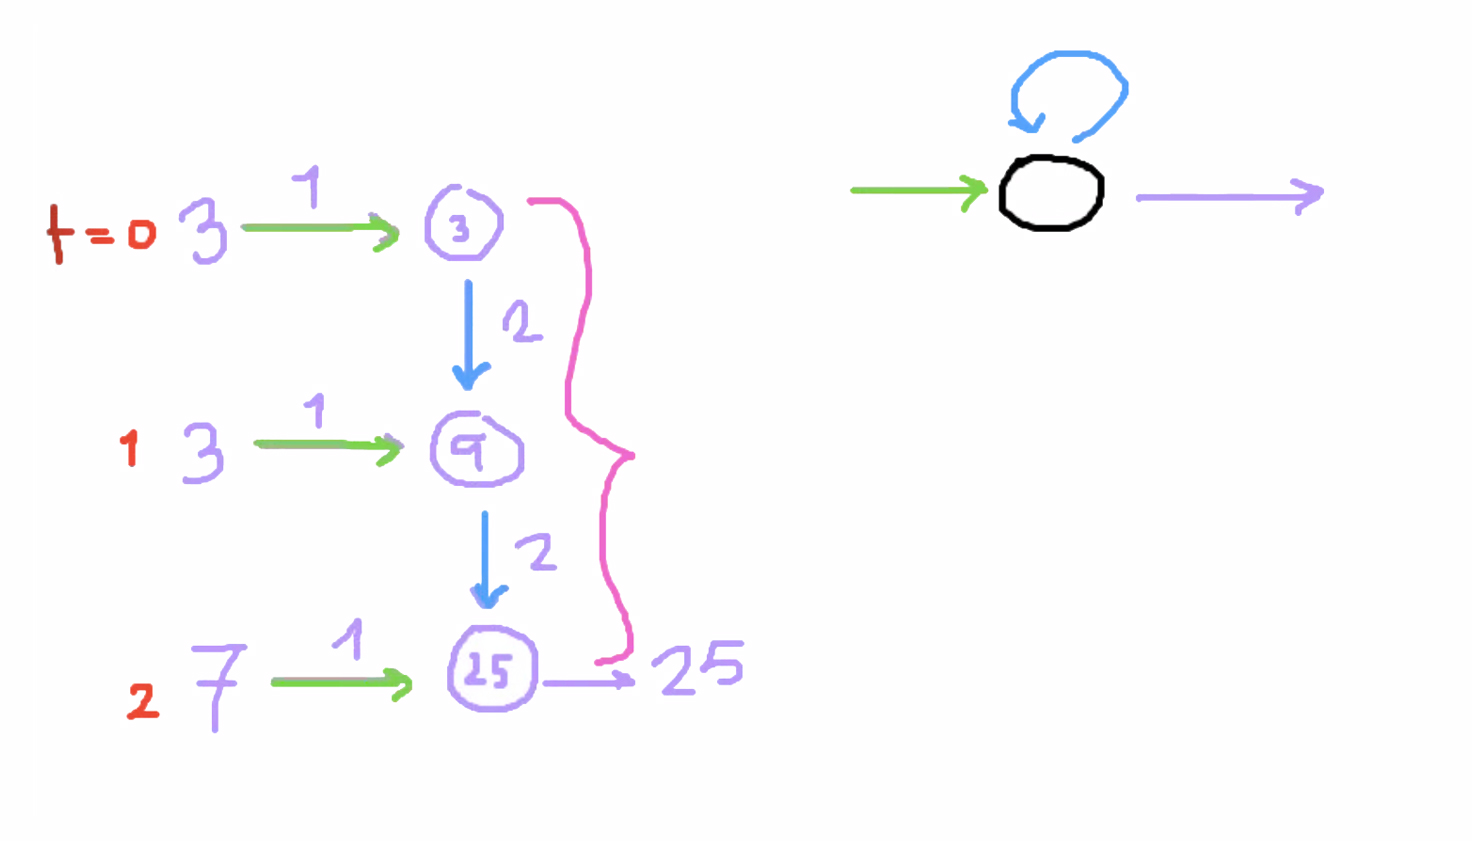

In [24]:
from IPython.display import Image
Image(filename='img.jpg')

The image above, drawn by Bradon Cho, shows the rnn for Example 2. First, the input is multiplied by `w1`, then added to the "working number," as I will call it, and then multiplied by `w2`, becoming the new "working number. The process repeats until there are no more inputs (the last value is not multiplied by `w2`).

## Part B: Two Unit Simple Recurrent Layer

In [8]:
two_unit_SRNN = Sequential()
two_unit_SRNN.add(SimpleRNN(units=2, input_shape=(None, 1), activation='linear', use_bias=False))

In [9]:
two_unit_SRNN_weights = two_unit_SRNN.get_weights()
two_unit_SRNN_weights

[array([[-0.91350394, -0.09060729]], dtype=float32),
 array([[-0.98227537,  0.18744422],
        [-0.18744422, -0.98227525]], dtype=float32)]

In [10]:
two_unit_SRNN_weights[0][0][0] = 1
two_unit_SRNN_weights[0][0][1] = 1
two_unit_SRNN_weights[1][0][0] = 0
two_unit_SRNN_weights[1][0][1] = 1
two_unit_SRNN_weights[1][1][0] = 0
two_unit_SRNN_weights[1][1][1] = 1
two_unit_SRNN.set_weights(two_unit_SRNN_weights)
two_unit_SRNN.get_weights()

[array([[1., 1.]], dtype=float32),
 array([[0., 1.],
        [0., 1.]], dtype=float32)]

This passes in a single sample with four time steps.

In [11]:
two_unit_SRNN.predict(numpy.array([ [[3], [3], [7], [5]] ]))

array([[ 5., 31.]], dtype=float32)

## Part B Exercise
What do each of the six weights of the two_unit_SRNN control? Again, test out your hypotheses carefully.

In [32]:
# example 1
# first column 1s, second column 0s --> 3+3+7+5=18...hmm
two_unit_SRNN_weights[0][0][0] = 1
two_unit_SRNN_weights[0][0][1] = 0
two_unit_SRNN_weights[1][0][0] = 1
two_unit_SRNN_weights[1][0][1] = 0
two_unit_SRNN_weights[1][1][0] = 1
two_unit_SRNN_weights[1][1][1] = 0
two_unit_SRNN.set_weights(two_unit_SRNN_weights)
two_unit_SRNN.predict(numpy.array([ [[3], [3], [7], [5]] ]))

array([[18.,  0.]], dtype=float32)

In [34]:
# example 2
# the opposite holds true as well
two_unit_SRNN_weights[0][0][0] = 0
two_unit_SRNN_weights[0][0][1] = 1
two_unit_SRNN_weights[1][0][0] = 0
two_unit_SRNN_weights[1][0][1] = 1
two_unit_SRNN_weights[1][1][0] = 0
two_unit_SRNN_weights[1][1][1] = 1
two_unit_SRNN.set_weights(two_unit_SRNN_weights)
two_unit_SRNN.predict(numpy.array([ [[3], [3], [7], [5]] ]))

array([[ 0., 18.]], dtype=float32)

In [37]:
# example 3
# but all 1s does not give us [[18., 18.]]
two_unit_SRNN_weights[0][0][0] = 1
two_unit_SRNN_weights[0][0][1] = 1
two_unit_SRNN_weights[1][0][0] = 1
two_unit_SRNN_weights[1][0][1] = 1
two_unit_SRNN_weights[1][1][0] = 1
two_unit_SRNN_weights[1][1][1] = 1
two_unit_SRNN.set_weights(two_unit_SRNN_weights)
two_unit_SRNN.predict(numpy.array([ [[3], [3], [7], [5]] ]))

array([[55., 55.]], dtype=float32)

In [38]:
# example 4
# first array = 1s, second array = 0s
two_unit_SRNN_weights[0][0][0] = 1
two_unit_SRNN_weights[0][0][1] = 1
two_unit_SRNN_weights[1][0][0] = 0
two_unit_SRNN_weights[1][0][1] = 0
two_unit_SRNN_weights[1][1][0] = 0
two_unit_SRNN_weights[1][1][1] = 0
two_unit_SRNN.set_weights(two_unit_SRNN_weights)
two_unit_SRNN.predict(numpy.array([ [[3], [3], [7], [5]] ]))

array([[5., 5.]], dtype=float32)

In [41]:
# example 5
# first array = 0s, second array = 1s
two_unit_SRNN_weights[0][0][0] = 0
two_unit_SRNN_weights[0][0][1] = 0
two_unit_SRNN_weights[1][0][0] = 1
two_unit_SRNN_weights[1][0][1] = 1
two_unit_SRNN_weights[1][1][0] = 1
two_unit_SRNN_weights[1][1][1] = 1
two_unit_SRNN.set_weights(two_unit_SRNN_weights)
two_unit_SRNN.predict(numpy.array([ [[3], [3], [7], [5]] ]))

array([[0., 0.]], dtype=float32)

## Part C: LSTM Layer
### Optional

In [12]:
one_unit_LSTM = Sequential()
one_unit_LSTM.add(LSTM(units=1, input_shape=(None, 1),
                       activation='linear', recurrent_activation='linear',
                       use_bias=False, unit_forget_bias=False,
                       kernel_initializer='zeros',
                       recurrent_initializer='zeros',
                       return_sequences=True))

In [13]:
one_unit_LSTM_weights = one_unit_LSTM.get_weights()
one_unit_LSTM_weights

[array([[0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0.]], dtype=float32)]

In [14]:
one_unit_LSTM_weights[0][0][0] = 1
one_unit_LSTM_weights[0][0][1] = 0
one_unit_LSTM_weights[0][0][2] = 1
one_unit_LSTM_weights[0][0][3] = 1
one_unit_LSTM_weights[1][0][0] = 0
one_unit_LSTM_weights[1][0][1] = 0
one_unit_LSTM_weights[1][0][2] = 0
one_unit_LSTM_weights[1][0][3] = 0
one_unit_LSTM.set_weights(one_unit_LSTM_weights)
one_unit_LSTM.get_weights()

[array([[1., 0., 1., 1.]], dtype=float32),
 array([[0., 0., 0., 0.]], dtype=float32)]

In [15]:
one_unit_LSTM.predict(numpy.array([ [[0], [1], [2], [4]] ]))

array([[[ 0.],
        [ 1.],
        [ 8.],
        [64.]]], dtype=float32)

## Part C Exercise
### Optional
Conceptually, the [LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) has several _gates_:

* __Forget gate__: these weights allow some long-term memories to be forgotten.
* __Input gate__: these weights decide what new information will be added to the context cell.
* __Output gate__: these weights decide what pieces of the new information and updated context will be passed on to the output.

It also has a __cell__ that can hold onto information from the current input (as well as things it has remembered from previous inputs), so that it can be used in later outputs.

Identify which weights in the one_unit_LSTM model are connected with the context and which are associated with the three gates. This is considerably more difficult to do by looking at the inputs and outputs, so you could also treat this as a code reading exercise and look through the keras code to find the answer.

_Note_: The output from the predict call is what the linked explanation calls $h_{t}$.